In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


## Dataset Description
* step: represents a unit of time where 1 step equals 1 hour
* type: type of online transaction
* amount: the amount of the transaction
* nameOrig: customer starting the transaction
* oldbalanceOrg: balance before the transaction
* newbalanceOrig: balance after the transaction
* nameDest: recipient of the transaction
* oldbalanceDest: initial balance of recipient before the transaction
* newbalanceDest: the new balance of recipient after the transaction
* isFraud: fraud transaction

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
# Checking duplicated values
len(df[df.duplicated()])

0

In [5]:
# Checking null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# Checking data shape
df.shape

(6362620, 11)

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Exploratory Data Analysis

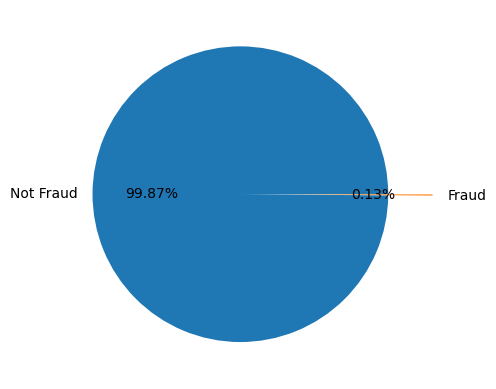

In [8]:
# Let's start checking the distribution balance of our target
plt.pie(df['isFraud'].value_counts(), labels=['Not Fraud', 'Fraud'], autopct="%0.2f%%", explode=(0,0.3))
plt.show()

In [9]:
# We have an imbalanced dataset, let's check the total of Fraud Transactions
len(df[df['isFraud']==1])

8213

## Transaction type

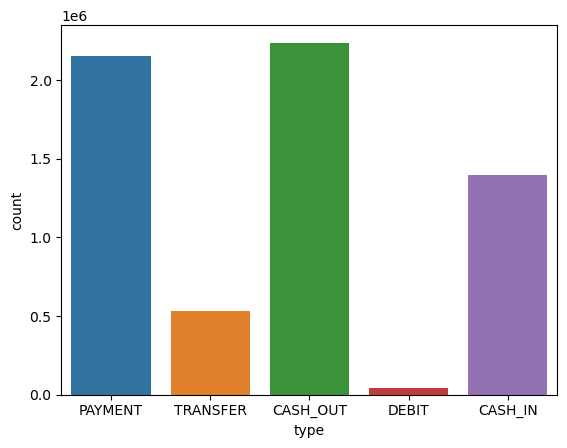

In [10]:
# The types of transactions
sns.countplot(df, x='type')
plt.show()

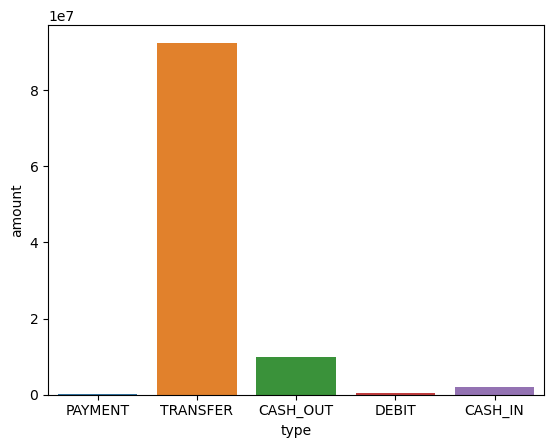

In [11]:
# Maximum value per type of transaction
order = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']
max_amount_by_type = df.groupby('type')['amount'].max().reset_index()
max_amount_by_type['type'] = pd.Categorical(max_amount_by_type['type'], categories=order)
sns.barplot(max_amount_by_type, x='type',y='amount')
plt.show()

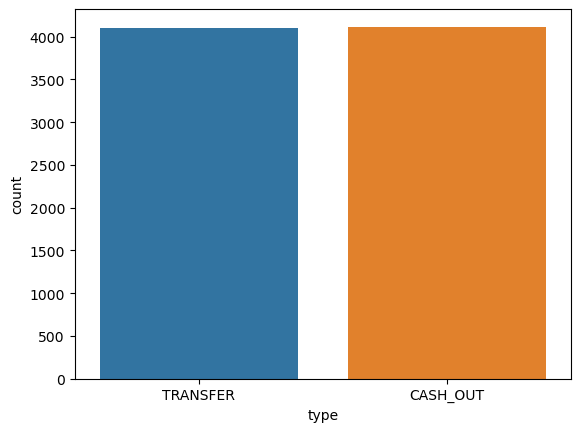

In [12]:
# The types of fraud transactions
sns.countplot(df[df['isFraud']==1], x='type')
plt.show()

We see that fraud transactions were only in Transfer and Cash out transactions

In [13]:
# Let's get the percentage of Transfer and Cash out transactions that are fraud
transfer_fraud_percentage = len(df[(df['isFraud']==1)&(df['type']=='TRANSFER')]) / len(df[df['type']=='TRANSFER'])*100
cashout_fraud_percentage = len(df[(df['isFraud']==1)&(df['type']=='CASH_OUT')]) / len(df[df['type']=='CASH_OUT'])*100
print(f'% of fraud Transfer transactions: {"%0.2f%%" % transfer_fraud_percentage}')
print(f'% of fraud Cash Out transactions: {"%0.2f%%" % cashout_fraud_percentage}')

% of fraud Transfer transactions: 0.77%
% of fraud Cash Out transactions: 0.18%


## Transaction amount

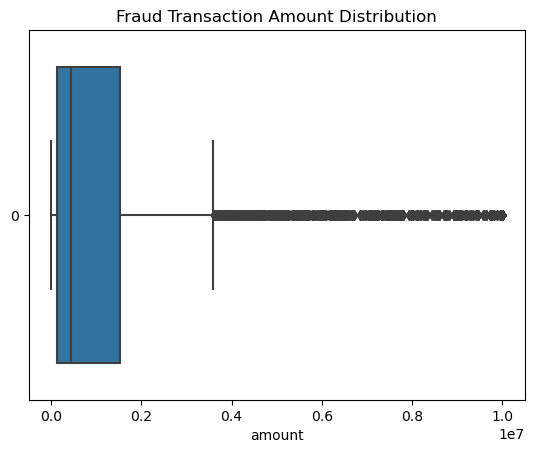

In [14]:
sns.boxplot(df[df['isFraud']==1]["amount"].values, orient='h')
#plt.xscale('log')
plt.title('Fraud Transaction Amount Distribution')
plt.xlabel('amount')
plt.show()

## Transaction hours

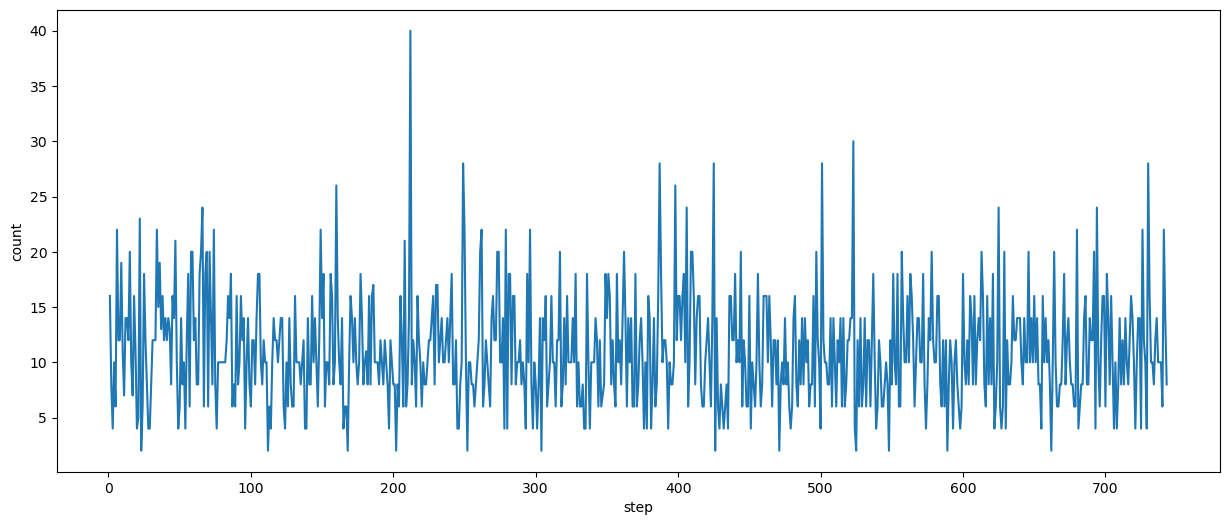

In [15]:
# Is there an increase of fraud over time?
plt.figure(figsize=(15,6))
plt.plot(df[df['isFraud']==1]['step'].value_counts().sort_index())
# we could also have used plt.plot(df.groupby('step')['isFraud'].sum())
plt.xlabel('step')
plt.ylabel('count')
plt.show()

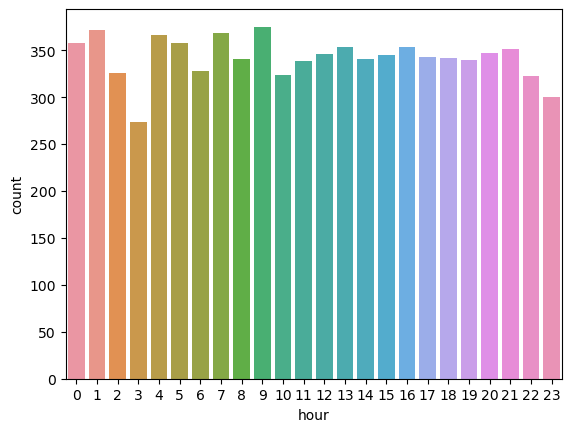

In [16]:
# Lets assume step of 1 is hour 0 and transform our data to go from 0 to 23 hours
df['hour'] = (df['step'] - 1) % 24
# Now let's check how is the fraud transactions over the hours
sns.countplot(df[df['isFraud']==1], x="hour")
plt.show()

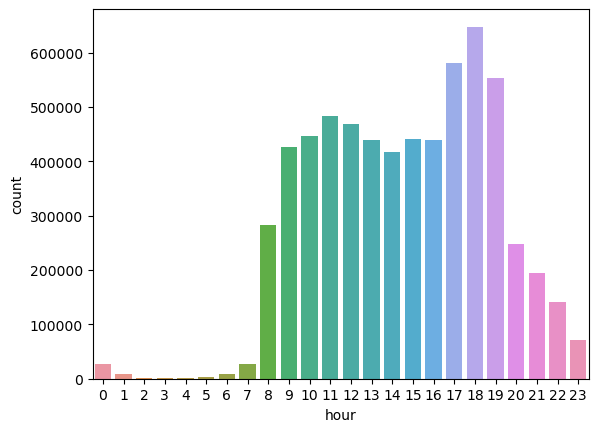

In [17]:
# We can also analyse how is the amount of transactions over the hours
sns.countplot(df, x='hour')
plt.show()

18h is when we have more transactions

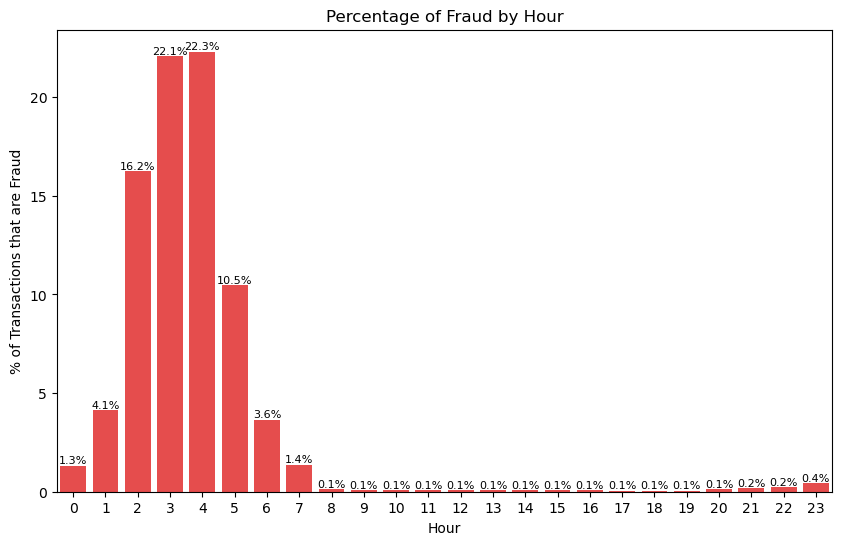

In [18]:
# Now let's evaluate the percentage of fraud transactions over the hours
fraud_percentage_by_hour = (df[df['isFraud'] == 1]['hour'].value_counts() / df['hour'].value_counts()) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_percentage_by_hour.index, y=fraud_percentage_by_hour.values, color='red', alpha=0.8)

plt.xlabel('Hour')
plt.ylabel('% of Transactions that are Fraud')
plt.title('Percentage of Fraud by Hour')
for index, value in enumerate(fraud_percentage_by_hour):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=8)
plt.show()

## Origin of the transaction

In [19]:
# How much unique origins do we have?
len(df['nameOrig'].unique())

6353307

In [20]:
# How much a origin repeat?
df['nameOrig'].value_counts().sort_values(ascending=False)

C1902386530    3
C2098525306    3
C363736674     3
C1530544995    3
C1065307291    3
              ..
C2043347152    1
C1317912992    1
C1896823979    1
C95254583      1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [21]:
# How much unique fraud origins do we have?
len(df[df['isFraud'] == 1]['nameOrig'].unique())

8213

In [22]:
# Is there Fraud Origins that appear more than one time?
df[df['isFraud'] == 1]['nameOrig'].value_counts().sort_values(ascending=False)

C1305486145    1
C2032147559    1
C1420196421    1
C2101527076    1
C137533655     1
              ..
C1162922333    1
C1685995037    1
C43545501      1
C1446317541    1
C1280323807    1
Name: nameOrig, Length: 8213, dtype: int64

## Recipient of the transaction

In [23]:
# How much unique recipients do we have?
len(df['nameDest'].unique())

2722362

In [24]:
# How much a recipient repeat?
df['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [25]:
# How much unique fraud recipients do we have?
len(df[df['isFraud'] == 1]['nameDest'].unique())

8169

In [26]:
# Is there Fraud Recipient that appear more than one time?
df[df['isFraud'] == 1]['nameDest'].value_counts()

C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
              ..
C317811789     1
C24324787      1
C1053414206    1
C2013070624    1
C873221189     1
Name: nameDest, Length: 8169, dtype: int64

<Axes: >

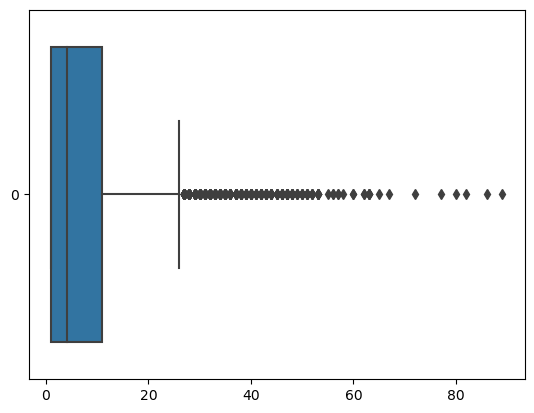

In [27]:
# How much transactions those with fraud transactions have
nameDest_counts = df.groupby('nameDest').size().reset_index(name='total_occurrences')
fraud_nameDest_counts = nameDest_counts[nameDest_counts['nameDest'].isin(df[df['isFraud'] == 1]['nameDest'])].reset_index(drop=True)

sns.boxplot(fraud_nameDest_counts['total_occurrences'], orient='h')

## Correlation

C:\Users\lucas\AppData\Local\Temp\ipykernel_11940\2479343607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

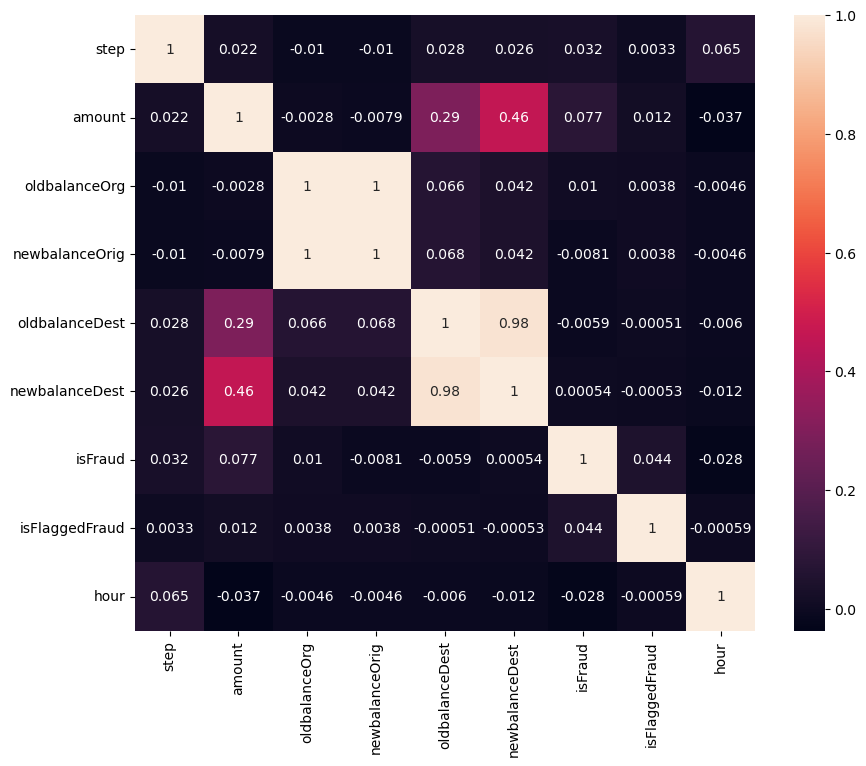

In [28]:
# ploting the heatmap of correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Model training

In [29]:
# Dropping columns that are not needed
df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)
# Applying encoding on type column
df_enc = pd.get_dummies(df, columns = ['type'])
df_enc

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,hour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,22,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,22,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,22,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,22,0,0,0,0,1


In [30]:
X = df_enc.drop('isFraud', axis = 1)
y = df_enc['isFraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.3, random_state = 0)

In [43]:
# importing the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)
print('LogisticRegression')
print(classification_report(y_test, y_lr_pred))

LogisticRegression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448115
           1       0.77      0.49      0.60      5719

    accuracy                           1.00   4453834
   macro avg       0.89      0.74      0.80   4453834
weighted avg       1.00      1.00      1.00   4453834



In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)
print('DecisionTreeClassifier')
print(classification_report(y_test, y_dt_pred))

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448115
           1       0.87      0.86      0.86      5719

    accuracy                           1.00   4453834
   macro avg       0.94      0.93      0.93   4453834
weighted avg       1.00      1.00      1.00   4453834



In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)
print('RandomForestClassifier')
print(classification_report(y_test, y_rf_pred))

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448115
           1       0.99      0.80      0.88      5719

    accuracy                           1.00   4453834
   macro avg       0.99      0.90      0.94   4453834
weighted avg       1.00      1.00      1.00   4453834



In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)
print('XGBClassifier')
print(classification_report(y_test, y_xgb_pred))

XGBClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448115
           1       0.97      0.87      0.92      5719

    accuracy                           1.00   4453834
   macro avg       0.99      0.93      0.96   4453834
weighted avg       1.00      1.00      1.00   4453834



We want to detect as many frauds as possible to minimize financial losses, so we will prioritize higher recall and look for the lowest number of False Negatives

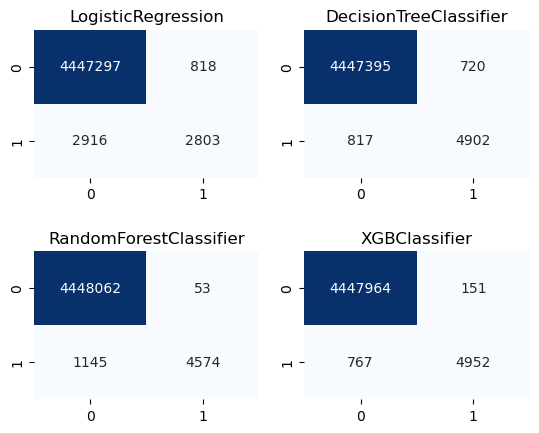

In [36]:
# Let's evaluate the confusion matrix for the models
plt.subplot(2,2,1)
sns.heatmap(confusion_matrix(y_test, y_lr_pred), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('LogisticRegression')
plt.subplot(2,2,2)
sns.heatmap(confusion_matrix(y_test, y_dt_pred), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('DecisionTreeClassifier')
plt.subplot(2,2,3)
sns.heatmap(confusion_matrix(y_test, y_rf_pred), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('RandomForestClassifier')
plt.subplot(2,2,4)
sns.heatmap(confusion_matrix(y_test, y_xgb_pred), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBClassifier')
plt.subplots_adjust(hspace=0.5)
plt.show()

RandomForest gave us the lowest False Positive and XGB gave us the lowest False Negative

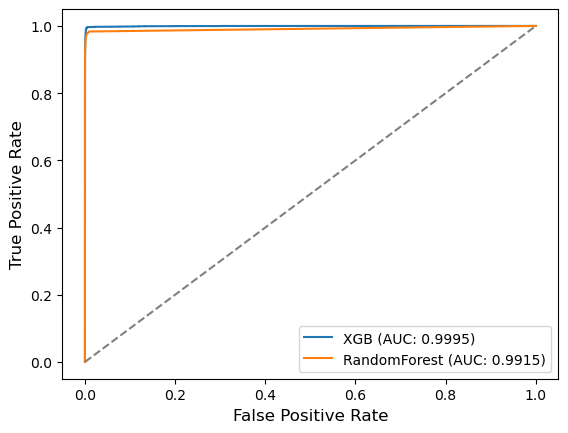

In [37]:
# We can also plot the ROC curve for our best models
y_scores_xgb = xgb.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGB (AUC: {roc_auc_xgb:.4f})')

y_scores_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC: {roc_auc_rf:.4f})')

plt.plot([0, 1], [0, 1], '--', color='grey')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.show()

PR-AUC (Precision-Recall Area Under the Curve) is an ML metric used to evaluate the performance of binary classification models, mainly when the classes are imbalanced. 

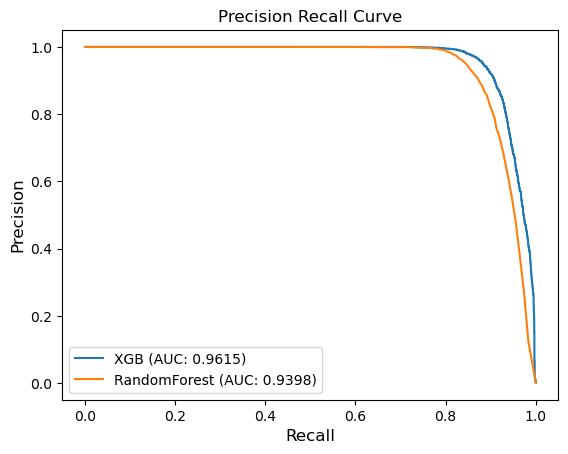

In [50]:
# plotting Precision-Recall AUC
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_scores_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)
plt.plot(recall_xgb,precision_xgb, label=f'XGB (AUC: {pr_auc_xgb:.4f})')

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)
pr_auc_rf = auc(recall_rf, precision_rf)
plt.plot(recall_rf,precision_rf, label=f'RandomForest (AUC: {pr_auc_rf:.4f})')

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision Recall Curve',fontsize=12)
plt.legend()
plt.show()

# Hyperparameter tuning for XGBClassifier

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

param_grid = {
    'max_depth': [3, 4, 5],             
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300, 400, 500, 1000]
}
    
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='recall',
    cv=3,
    verbose=2
)
    
grid_search.fit(X_train, y_train)
y_gs_pred = grid_search.predict(X_test)
recall_score(y_test, y_gs_pred)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   4.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   4.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   3.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   7.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   7.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   6.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   9.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=  10.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   9.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=400; total time=  13.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=400; total time=  13.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_e

[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=400; total time=  19.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=  24.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=  24.7s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=  25.3s
[CV] END .learning_rate=0.01, max_depth=5, n_estimators=1000; total time=  43.2s
[CV] END .learning_rate=0.01, max_depth=5, n_estimators=1000; total time=  37.5s
[CV] END .learning_rate=0.01, max_depth=5, n_estimators=1000; total time=  38.9s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=100; total time=   3.5s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=100; total time=   3.6s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=100; total time=   3.6s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   6.7s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   7.0s
[CV] END .learning_rate=0.00

0.8702570379436965

In [39]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000}

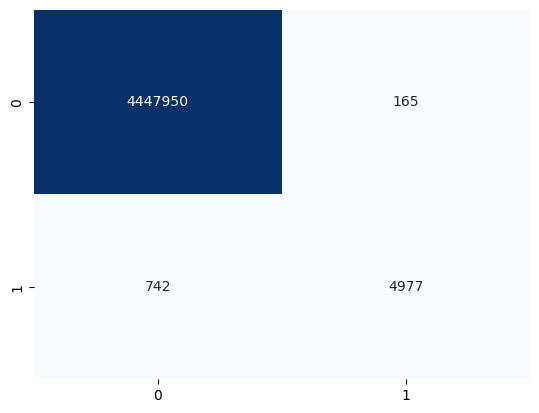

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448115
           1       0.97      0.87      0.92      5719

    accuracy                           1.00   4453834
   macro avg       0.98      0.94      0.96   4453834
weighted avg       1.00      1.00      1.00   4453834



In [40]:
# Checking the scores of the best model
best_xgb = grid_search.best_estimator_
y_best_pred = best_xgb.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_best_pred), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.show()
print(classification_report(y_test, y_best_pred))

We went from 767 to 742 False Negatives 

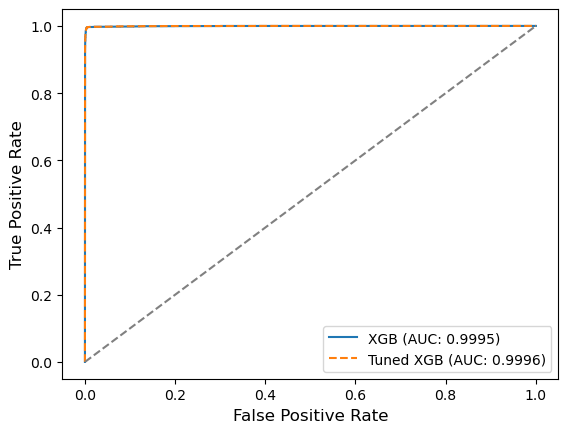

In [41]:
# plotting the ROC curve for ou tuned model
y_scores_xgb = xgb.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGB (AUC: {roc_auc_xgb:.4f})')

y_scores_best = best_xgb.predict_proba(X_test)[:,1]
fpr_best, tpr_best, _ = roc_curve(y_test, y_scores_best)
roc_auc_best = auc(fpr_best, tpr_best)
plt.plot(fpr_best, tpr_best, '--', label=f'Tuned XGB (AUC: {roc_auc_best:.4f})')

plt.plot([0, 1], [0, 1], '--', color='grey')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.show()

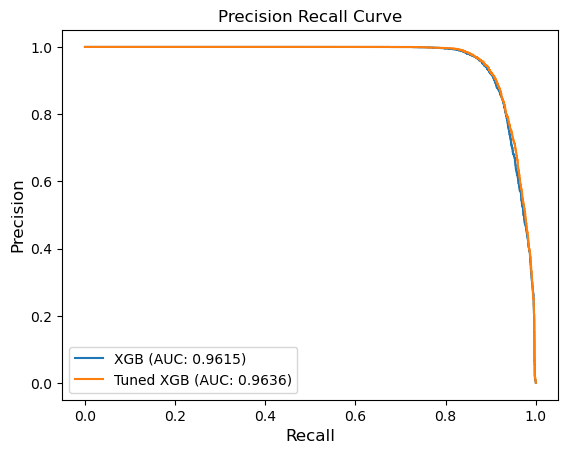

In [51]:
# plotting the Precision Recall curve for our tuned model

plt.plot(recall_xgb,precision_xgb, label=f'XGB (AUC: {pr_auc_xgb:.4f})')

precision_best, recall_best, _ = precision_recall_curve(y_test, y_scores_best)
pr_auc_best = auc(recall_best, precision_best)
plt.plot(recall_best,precision_best, label=f'Tuned XGB (AUC: {pr_auc_best:.4f})')

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision Recall Curve',fontsize=12)
plt.legend()
plt.show()

# Feature Importance

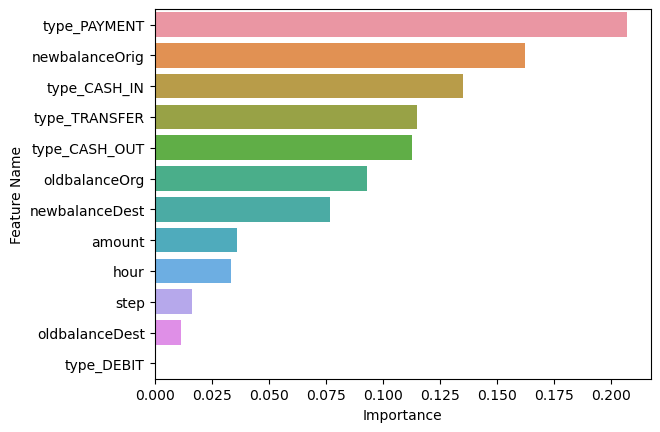

In [42]:
fi_df = pd.DataFrame({'Feature Name': X_train.columns, 'Importance': best_xgb.feature_importances_})
fi_df = fi_df.sort_values(by='Importance', ascending = False)
sns.barplot(fi_df, x='Importance', y='Feature Name')
plt.show()

The feature hour that we added had higher importance than step

# Conclusion
We achieved a model with great metrics that can predict fraud transactions, obtaining a recall of 0.87, out of 5719 fraud transactions we predicted 4977